<a href="https://colab.research.google.com/github/fernandoGitHub/ML_Projects/blob/main/UNDP_Demographics_Data/UNDP_Demographics_Data_Analysis-Part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNDP Demographics Data Analysis
In this notebook we will explore the database per particular year and see if there is any underlying pattern or structure within.
For that, we will create example vectors for each country based on 2019 data and apply different clusterization and hyperparameter tuning mechanisms

# Setup

In [1]:
!wget https://raw.githubusercontent.com/fernandoGitHub/MLOPS_GSD/main/MLOP_setup.py
import MLOP_setup

MLOP_setup.install_package('WGET')

--2022-05-22 18:36:58--  https://raw.githubusercontent.com/fernandoGitHub/MLOPS_GSD/main/MLOP_setup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176 (2.1K) [text/plain]
Saving to: ‘MLOP_setup.py’

MLOP_setup.py       100%[===================>]   2.12K  --.-KB/s    in 0s      

2022-05-22 18:36:58 (26.9 MB/s) - ‘MLOP_setup.py’ saved [2176/2176]

Installing wget ...
Package wget has been successfully installed
Reloading Packages


In [2]:
import os
import shutil
import wget

import numpy as np
import pandas as pd

import pprint
pp = pprint.PrettyPrinter()

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Preparation

In [4]:
_RAW_DATA_DIR = './raw_data/'
_ZIP_FILENAME = 'UNDP-Processed.zip'
_UTILS_FILENAME = 'UNDP_utils.py'
_DATA_REP_URL = 'https://github.com/fernandoGitHub/ML_Projects/raw/main/UNDP_Demographics_Data/data/'
_UTILS_REP_URL = 'https://github.com/fernandoGitHub/ML_Projects/raw/main/UNDP_Demographics_Data/'

_ZIP_FULL_PATH = os.path.join(_RAW_DATA_DIR, _ZIP_FILENAME)
_ZIP_URL_PATH = os.path.join(_DATA_REP_URL, _ZIP_FILENAME)
_UTILS_URL_PATH = os.path.join(_UTILS_REP_URL, _UTILS_FILENAME)
_UTILS_FULL_PATH = os.path.join('.', _UTILS_FILENAME)

if os.path.isdir('./sample_data'):
  shutil.rmtree('./sample_data')

if not os.path.isdir(_RAW_DATA_DIR):
  os.makedirs(_RAW_DATA_DIR)

if not os.path.isfile(_UTILS_FULL_PATH):
  file_name = wget.download(_UTILS_URL_PATH)
  print(f"Fetching from GitHub: {file_name} ...")

if not os.path.isfile(_ZIP_FULL_PATH):
  file_name = wget.download(_ZIP_URL_PATH)
  print(f"Fetching from GitHub: {file_name} ...")
  os.replace(os.path.join('.', _ZIP_FILENAME), _ZIP_FULL_PATH)

Fetching from GitHub: UNDP_utils.py ...
Fetching from GitHub: UNDP-Processed.zip ...


In [5]:
import UNDP_utils

In [6]:
_PROCESSED_DATA_DIR = './processed_data'
if not os.path.isdir(_PROCESSED_DATA_DIR):
  os.makedirs(_PROCESSED_DATA_DIR)

In [7]:
# Helper function to clean the raw_data directory
#shutil.rmtree('./raw_data')

In [7]:
from zipfile import ZipFile

with ZipFile(_ZIP_FULL_PATH, 'r') as zip:
  # printing all the contents of the zip file
  zip.printdir()

  # extracting all the files
  zip.extractall(_RAW_DATA_DIR)

File Name                                             Modified             Size
Urban_Population.csv                           2022-05-22 14:04:28        16101
Total_Population.csv                           2022-05-22 14:04:28        15556
Young_age_dependency_ratio.csv                 2022-05-22 14:04:28        14428
UNDP_Demographics_Data.csv                     2022-05-22 14:05:30        96183
Median_age.csv                                 2022-05-22 14:05:24        16155
Population_ages_15_64.csv                      2022-05-22 14:04:28        13582
Old_age_dependency_ratio.csv                   2022-05-22 14:04:28        13724
Population_under_age_5.csv                     2022-05-22 14:04:28        12824
y_pop_2030.csv                                 2022-05-22 14:05:26         3219
Population _ages_65 _and _older.csv            2022-05-22 14:04:28        12784


# Dataset Preparation

First, let's review the columnns at each dataset

**Finding:** We can see some irregularities:
   1.- Median and Sex Ratio have less columns (every 5 years)
   2.- Total population has an estimation for 2030

In [8]:
csv_file_list, csv_full_path_list = UNDP_utils.generate_file_list_from_dir(path=_RAW_DATA_DIR, filter = '.csv', display=True)

['Urban_Population.csv', 'Total_Population.csv', 'Young_age_dependency_ratio.csv', 'UNDP_Demographics_Data.csv', 'Median_age.csv', 'Population_ages_15_64.csv', 'Old_age_dependency_ratio.csv', 'Population_under_age_5.csv', 'y_pop_2030.csv', 'Population _ages_65 _and _older.csv']


**Next Tasks**
1.   Load the entire dataset in UNDP_Demographics_Data.csv to a raw dataframe
2.   Extract the statistics of 2019 in a new dataframe
3.   Transform the dataframe to percentage values to make it more useful
4.   Review dataframe info and save to file






In [9]:
# 1. Load the entire dataset in UNDP_Demographics_Data.csv to a raw dataframe
_raw_data_file = os.path.join(_RAW_DATA_DIR, 'UNDP_Demographics_Data.csv')

df_raw = pd.read_csv(_raw_data_file)

In [10]:
df_raw.head()

,Country,1990-Urban_Population,1995-Urban_Population,2000-Urban_Population,2005-Urban_Population,2010-Urban_Population,2011-Urban_Population,2012-Urban_Population,2013-Urban_Population,2014-Urban_Population,...,2010-Population _ages_65 _and _older,2011-Population _ages_65 _and _older,2012-Population _ages_65 _and _older,2013-Population _ages_65 _and _older,2014-Population _ages_65 _and _older,2015-Population _ages_65 _and _older,2016-Population _ages_65 _and _older,2017-Population _ages_65 _and _older,2018-Population _ages_65 _and _older,2019-Population _ages_65 _and _older
0,Albania,36.4,38.9,41.7,46.7,52.2,53.2,54.3,55.4,56.4,...,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4
1,Algeria,52.1,56.0,59.9,63.8,67.5,68.2,68.9,69.6,70.2,...,2.0,2.0,2.1,2.1,2.2,2.3,2.4,2.6,2.7,2.8
2,Angola,37.1,44.2,50.1,56.0,59.8,60.5,61.3,62.0,62.7,...,0.6,0.6,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.7
3,Antigua and Barbuda,35.4,34.0,32.1,29.2,26.2,25.7,25.5,25.4,25.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,87.0,88.2,89.1,90.0,90.8,91.0,91.1,91.2,91.4,...,4.2,4.3,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0


In [11]:
def slice_data_frame_by_year(df, year):
  df_year = df
  df_year = df_year.set_index('Country')
  for col in df_year.columns:
    if not(year in col):
      df_year = df_year.drop(col, axis=1)

  return df_year

In [12]:
# 2. Extract the statistics of 2019 in a new dataframe and save a copy
df_2019 = slice_data_frame_by_year(df_raw, '2019')
df_2019.name = 'df_2019'

In [13]:
from IPython.display import Markdown, display

def printmd(string, color=None):
  colorstr = "<span style='color:{}'>{}</span>".format(color, string)
  display(Markdown(colorstr))

In [14]:
df = df_2019
 
printmd(string=f'**Displaying DataFrame Information for {df.name}**', color='blue')
print('\n')
df.info()
print('\n\n')
df.head()
print('\n\n')
df.describe().transpose()
print('\n')
print (100*'-')
print('\n')

<span style='color:blue'>**Displaying DataFrame Information for df_2019**</span>



<class 'pandas.core.frame.DataFrame'>
Index: 175 entries,  Albania to  Zimbabwe
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   2019-Urban_Population                 175 non-null    float64
 1   2019-Total_Population                 175 non-null    float64
 2   2019-Young_age_dependency_ratio       175 non-null    float64
 3   2019-Median_age                       175 non-null    float64
 4   2019-Population_ages_15_64            175 non-null    float64
 5   2019-Old_age_dependency_ratio         175 non-null    float64
 6   2019-Population_under_age_5           175 non-null    float64
 7   2019-Population _ages_65 _and _older  175 non-null    float64
dtypes: float64(8)
memory usage: 12.3+ KB





,2019-Urban_Population,2019-Total_Population,2019-Young_age_dependency_ratio,2019-Median_age,2019-Population_ages_15_64,2019-Old_age_dependency_ratio,2019-Population_under_age_5,2019-Population _ages_65 _and _older
Country,,,,,,,,
Albania,61.2,2.9,25.4,36.1,2.0,20.8,0.2,0.4
Algeria,73.2,43.1,48.6,28.3,27.1,10.4,5.0,2.8
Angola,66.2,31.8,91.1,16.6,16.3,4.3,5.7,0.7
Antigua and Barbuda,24.5,0.1,31.8,33.7,0.1,13.1,0.0,0.0
Argentina,92.0,44.8,38.3,31.3,28.7,17.5,3.7,5.0


,count,mean,std,min,25%,50%,75%,max
2019-Urban_Population,175.0,60.188000,21.950158,13.2,42.90,60.3,78.00,100.0
2019-Total_Population,175.0,42.570286,154.254591,0.1,2.65,9.0,29.50,1433.8
2019-Young_age_dependency_ratio,175.0,43.529714,20.300108,16.0,25.90,38.1,58.00,94.2
2019-Median_age,175.0,30.468571,8.822039,16.2,22.60,29.6,38.20,48.0
2019-Population_ages_15_64,175.0,27.926857,105.898231,0.1,1.65,5.8,18.15,1014.0
2019-Old_age_dependency_ratio,175.0,14.165143,9.778183,1.4,6.30,10.4,22.20,47.1
2019-Population_under_age_5,175.0,3.652000,11.657033,0.0,0.20,0.7,2.75,116.8
2019-Population _ages_65 _and _older,175.0,3.953714,14.989225,0.0,0.10,0.6,2.20,164.5




----------------------------------------------------------------------------------------------------




In [15]:
def transform_dataframe(df):

  df['Population'] = df['2019-Total_Population']
  df['Pop <=5'] = np.round(df['2019-Population_under_age_5'] / df['2019-Total_Population'], 3)
  df['Pop >15 <=64'] = np.round(df['2019-Population_ages_15_64'] / df['2019-Total_Population'], 3)
  df['Pop >65'] = np.round(df['2019-Population _ages_65 _and _older'] / df['2019-Total_Population'], 3)
  df['Pop >5 <=14'] = np.round(1 - (df['Pop <=5'] + df['Pop >15 <=64'] + df['Pop >65']), 3)

  df['Dep <=5'] = np.round(df['2019-Young_age_dependency_ratio']/100, 3)
  df['Dep >65'] = np.round(df['2019-Old_age_dependency_ratio']/100, 3)

  df['Urban'] = np.round(df['2019-Urban_Population']/100, 3)
  df['Median'] = np.round(df['2019-Median_age'] / max(df['2019-Median_age']), 3)

  df['Population'] = np.round(df['Population'] / max(df['Population']), 3)
  # All the values will be normalized from 0 to 1 to avoid feature bias

  tf_columns = ['Population', 'Pop <=5', 'Pop >5 <=14', 'Pop >15 <=64', 'Pop >65', 'Dep <=5', 'Dep >65', 'Urban', 'Median']
  df_tf = pd.DataFrame(index=df.index, columns=tf_columns, data=df[tf_columns])

  # Cleaning the resulting df
  df_tf = df_tf.dropna()

  return df_tf 

In [16]:
# 3. Transform the dataframe to percentage values to make it more useful
df_2019 = transform_dataframe(df_2019)

In [17]:
# 4. Review dataframe info and save to file
df_2019.name = 'df_2019'
df = df_2019
 
printmd(string=f'**Displaying DataFrame Information for {df.name}**', color='blue')
print('\n')
df.info()
print('\n\n')
df.head()
print('\n\n')
df.describe().transpose()
print('\n')
print (100*'-')
print('\n')

<span style='color:blue'>**Displaying DataFrame Information for df_2019**</span>



<class 'pandas.core.frame.DataFrame'>
Index: 175 entries,  Albania to  Zimbabwe
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    175 non-null    float64
 1   Pop <=5       175 non-null    float64
 2   Pop >5 <=14   175 non-null    float64
 3   Pop >15 <=64  175 non-null    float64
 4   Pop >65       175 non-null    float64
 5   Dep <=5       175 non-null    float64
 6   Dep >65       175 non-null    float64
 7   Urban         175 non-null    float64
 8   Median        175 non-null    float64
dtypes: float64(9)
memory usage: 13.7+ KB





,Population,Pop <=5,Pop >5 <=14,Pop >15 <=64,Pop >65,Dep <=5,Dep >65,Urban,Median
Country,,,,,,,,,
Albania,0.002,0.069,0.103,0.690,0.138,0.254,0.208,0.612,0.752
Algeria,0.030,0.116,0.190,0.629,0.065,0.486,0.104,0.732,0.590
Angola,0.022,0.179,0.286,0.513,0.022,0.911,0.043,0.662,0.346
Antigua and Barbuda,0.000,0.000,0.000,1.000,0.000,0.318,0.131,0.245,0.702
Argentina,0.031,0.083,0.164,0.641,0.112,0.383,0.175,0.920,0.652


,count,mean,std,min,25%,50%,75%,max
Population,175.0,0.029657,0.107601,0.000,0.0020,0.006,0.0205,1.000
Pop <=5,175.0,0.085914,0.049389,0.000,0.0520,0.083,0.1250,0.179
Pop >5 <=14,175.0,0.173171,0.083895,0.000,0.1135,0.166,0.2275,0.500
Pop >15 <=64,175.0,0.653943,0.094807,0.500,0.6090,0.647,0.6735,1.000
Pop >65,175.0,0.086971,0.074170,0.000,0.0285,0.062,0.1500,0.333
Dep <=5,175.0,0.435297,0.203001,0.160,0.2590,0.381,0.5800,0.942
Dep >65,175.0,0.141651,0.097782,0.014,0.0630,0.104,0.2220,0.471
Urban,175.0,0.601880,0.219502,0.132,0.4290,0.603,0.7800,1.000
Median,175.0,0.634800,0.183768,0.337,0.4710,0.617,0.7960,1.000




----------------------------------------------------------------------------------------------------




In [18]:
df_2019.to_csv(os.path.join(_PROCESSED_DATA_DIR, '2019.csv'), index=True)

# Clustering Analysis
Finally, some fun. Let's check for internal structures using different clustering analysis techniques from Scikit Learn

In [19]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

**Next Tasks**
1.   Check clustering for different number of groups using all the data
2.   Plot a graph of Silhouette Score against number of groups



In [20]:
def find_clusters_by_KMeans(n_clusters, max_iter, data):
  kmeans_model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)

  score = metrics.silhouette_score(data, kmeans_model.labels_)
  centroids = kmeans_model.cluster_centers_
  labels = kmeans_model.labels_

  return kmeans_model, centroids, labels, score

In [21]:
results = {}
for i in range(2, 20):
  kmeans_model, centroids, labels, score = find_clusters_by_KMeans(n_clusters=i, max_iter=1000, data=df_2019)
  results[i] = {'model':kmeans_model, 'centroids':centroids, 'labels':labels, 'score':score}

In [22]:
x = []
y = []
for i, (key, value) in enumerate(results.items()):
  x.append(key)
  y.append(value['score'])

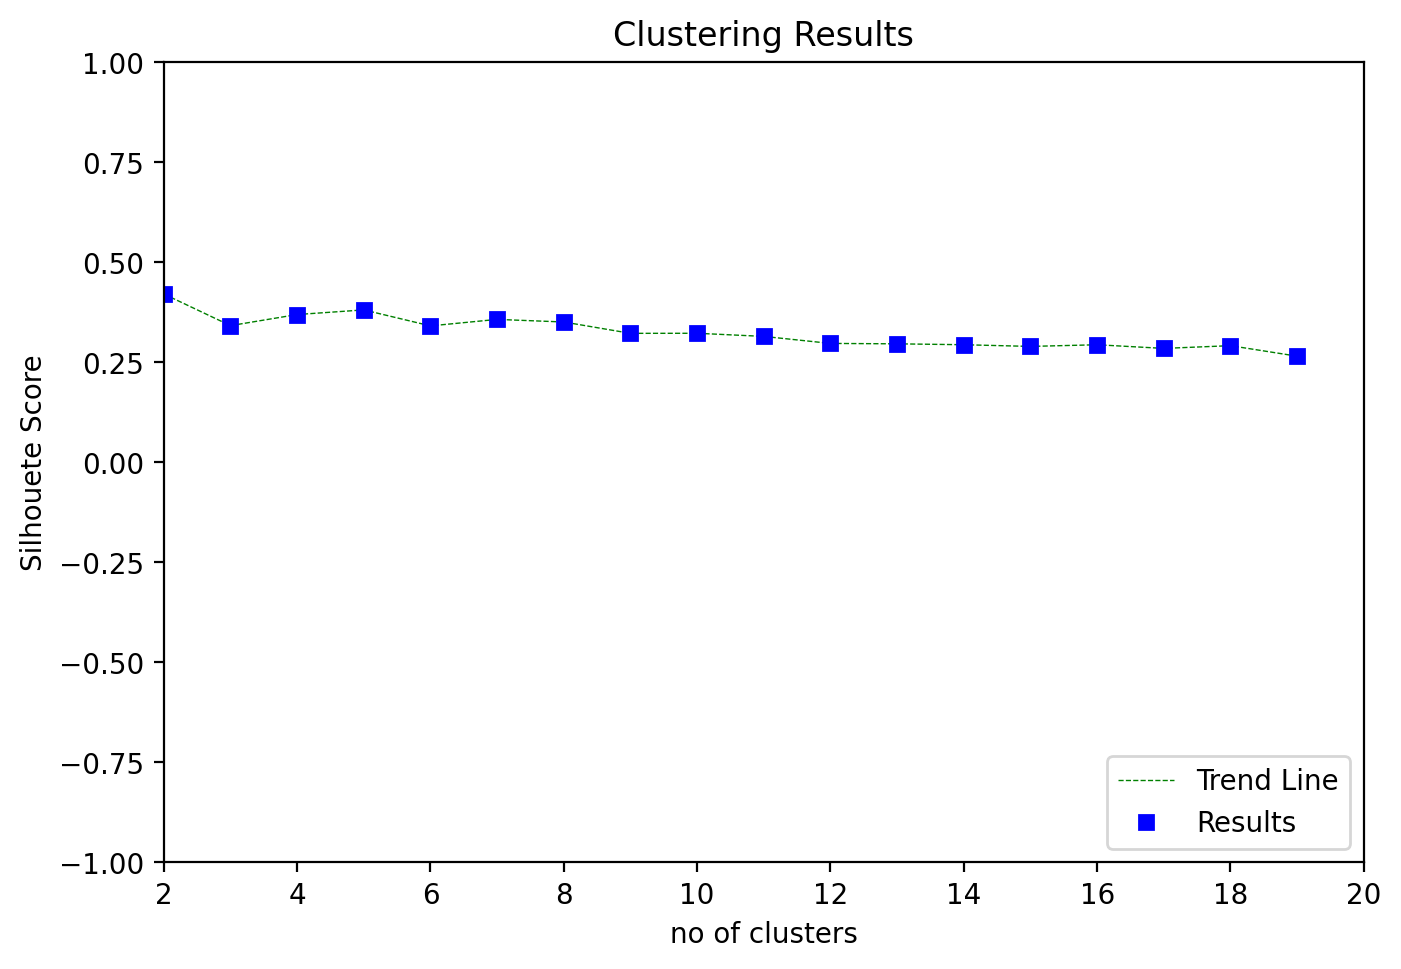

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,4),dpi=200)
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(x, y, 'g--', lw=0.5, label='Trend Line')
ax.plot(x, y, 'b', lw=0, ms=5, marker='s', label='Results')
ax.set_xlabel('no of clusters')
ax.set_ylabel('Silhouete Score')
ax.set_title('Clustering Results')
ax.legend(loc=4)

plt.xlim(2, 20)
plt.ylim(-1, 1);


**Notes and Findings**
By purpose, the Silhouette graph axis has been kept in the range of (-1, 1). Silhouettes can be negative and a value of 0.5 upwards may be considered acceptable.
In this case, we see that n = 2 and n = 5 have better values. 
Let's explore same cases cases.

**Next Tasks**
1.   Review results for selected clusterization cases and select most promising case
2.   Analyze country distribution
3.   Plot relationship among features



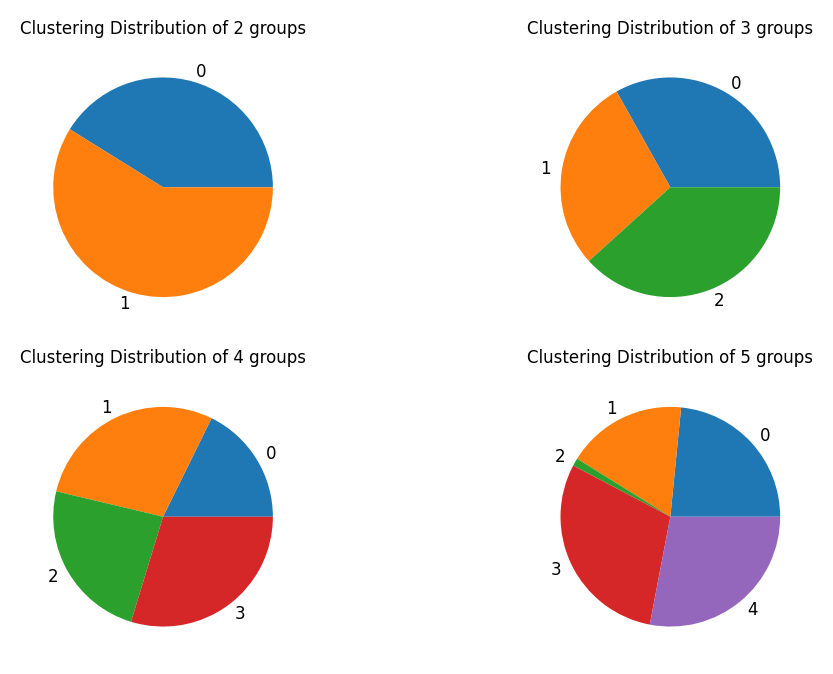

In [24]:
# 1 - Review results for selected clusterization cases and select most promising case
from IPython.display import clear_output

# Let's add n = 4 & n = 5 to make it more interesting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4),dpi=200);

for n in range (2, 5+1):
  values = results[n]
  labels = values['labels']
  unique, counts = np.unique(labels, return_counts=True)

  i = int((n-2)/2)
  j = (n-2)%2
  axes[i][j].pie(counts, labels = unique, textprops={'fontsize': 6});
  axes[i][j].set_title(f'Clustering Distribution of {n} groups', fontsize=6);

clear_output(wait=True)

\**Notes and Conclusions**
Wow! Before scaling the data we got no clusters at all. Due to the huge size of India and China's population, scaling is a must. 
Let's try to understand the cases.

In [25]:
# 2 - Analyze country distribution
for n in range(2, 5+1):
  values = results[n]
  labels = values['labels']

  printmd(string=f'**Country distribution for {n} clusters**', color='blue')
  for i in range(0, n):
    pp.pprint(df_2019[labels==i].index)
  print(100 * '-')
  print('\n\n')

<span style='color:blue'>**Country distribution for 2 clusters**</span>

Index([' Angola', ' Bangladesh', ' Belize', ' Benin', ' Bhutan',
       ' Bolivia (Plurinational State of)', ' Botswana', ' Burkina Faso',
       ' Cambodia', ' Cameroon', ' Central African Republic', ' Comoros',
       ' Congo', ' Congo (Democratic Republic of the)', ' Côte d'Ivoire',
       ' Egypt', ' Equatorial Guinea', ' Eswatini (Kingdom of)', ' Ethiopia',
       ' Fiji', ' Gabon', ' Gambia', ' Ghana', ' Guatemala', ' Guinea',
       ' Guinea-Bissau', ' Guyana', ' Haiti', ' Honduras', ' India', ' Iraq',
       ' Kiribati', ' Kyrgyzstan', ' Lao People's Democratic Republic',
       ' Lesotho', ' Liberia', ' Madagascar', ' Malawi', ' Mali',
       ' Mauritania', ' Micronesia (Federated States of)', ' Mozambique',
       ' Myanmar', ' Namibia', ' Nepal', ' Nicaragua', ' Nigeria', ' Pakistan',
       ' Palestine, State of', ' Papua New Guinea', ' Paraguay',
       ' Philippines', ' Saint Lucia', ' Samoa', ' Senegal', ' Sierra Leone',
       ' Solomon Islands', ' Somalia', ' South Sud

<span style='color:blue'>**Country distribution for 3 clusters**</span>

Index([' Albania', ' Argentina', ' Australia', ' Austria', ' Belarus',
       ' Belgium', ' Bosnia and Herzegovina', ' Brazil', ' Bulgaria',
       ' Canada', ' Chile', ' Costa Rica', ' Croatia', ' Cuba', ' Cyprus',
       ' Czechia', ' Denmark', ' Estonia', ' Finland', ' France', ' Georgia',
       ' Germany', ' Greece', ' Hong Kong, China (SAR)', ' Hungary',
       ' Iceland', ' Ireland', ' Israel', ' Italy', ' Japan',
       ' Korea (Republic of)', ' Kuwait', ' Latvia', ' Lithuania',
       ' Luxembourg', ' Malta', ' Montenegro', ' Netherlands', ' New Zealand',
       ' North Macedonia', ' Norway', ' Poland', ' Portugal', ' Qatar',
       ' Romania', ' Russian Federation', ' Serbia', ' Singapore', ' Slovakia',
       ' Slovenia', ' Spain', ' Sweden', ' Switzerland', ' Thailand',
       ' Ukraine', ' United Kingdom', ' United States', ' Uruguay'],
      dtype='object', name='Country')
Index([' Angola', ' Benin', ' Burkina Faso', ' Cambodia', ' Cameroon',
       ' Central African Repu

<span style='color:blue'>**Country distribution for 4 clusters**</span>

Index([' Antigua and Barbuda', ' Bangladesh', ' Barbados', ' Belize',
       ' Bhutan', ' Cambodia', ' China', ' Grenada', ' Guyana', ' India',
       ' Indonesia', ' Kiribati', ' Kyrgyzstan',
       ' Lao People's Democratic Republic', ' Lesotho', ' Maldives',
       ' Mauritius', ' Micronesia (Federated States of)',
       ' Moldova (Republic of)', ' Myanmar', ' Nepal', ' Philippines',
       ' Saint Lucia', ' Saint Vincent and the Grenadines', ' Seychelles',
       ' Sri Lanka', ' Tonga', ' Trinidad and Tobago', ' Turkmenistan',
       ' Uzbekistan', ' Viet Nam'],
      dtype='object', name='Country')
Index([' Algeria', ' Argentina', ' Armenia', ' Azerbaijan', ' Bahamas',
       ' Bahrain', ' Bolivia (Plurinational State of)', ' Botswana', ' Brazil',
       ' Brunei Darussalam', ' Cabo Verde', ' Colombia', ' Costa Rica',
       ' Djibouti', ' Dominican Republic', ' Ecuador', ' El Salvador',
       ' Equatorial Guinea', ' Fiji', ' Gabon', ' Haiti', ' Honduras',
       ' Iran (Islamic

<span style='color:blue'>**Country distribution for 5 clusters**</span>

Index([' Angola', ' Benin', ' Burkina Faso', ' Cameroon',
       ' Central African Republic', ' Comoros', ' Congo',
       ' Congo (Democratic Republic of the)', ' Côte d'Ivoire', ' Egypt',
       ' Eswatini (Kingdom of)', ' Ethiopia', ' Gambia', ' Ghana',
       ' Guatemala', ' Guinea', ' Guinea-Bissau', ' Liberia', ' Madagascar',
       ' Malawi', ' Mali', ' Mauritania', ' Mozambique', ' Namibia',
       ' Nigeria', ' Pakistan', ' Papua New Guinea', ' Samoa', ' Senegal',
       ' Sierra Leone', ' Solomon Islands', ' Somalia', ' South Sudan',
       ' Sudan', ' Tajikistan', ' Tanzania (United Republic of)',
       ' Timor-Leste', ' Togo', ' Vanuatu', ' Zambia', ' Zimbabwe'],
      dtype='object', name='Country')
Index([' Antigua and Barbuda', ' Azerbaijan', ' Bangladesh', ' Barbados',
       ' Belize', ' Bhutan', ' Cambodia', ' Grenada', ' Guyana', ' Indonesia',
       ' Jamaica', ' Kiribati', ' Kyrgyzstan',
       ' Lao People's Democratic Republic', ' Lesotho', ' Maldives',
       '

**Notes and Findings** - I cannot see a clear explanation for the clusterization. Please bare in mind that the silhouette value is very low so by definition, there is no such clear separation. 
Let's keep working with n = 4 (just for fun)

In [26]:
df_2019.columns

Index(['Population', 'Pop <=5', 'Pop >5 <=14', 'Pop >15 <=64', 'Pop >65',
       'Dep <=5', 'Dep >65', 'Urban', 'Median'],
      dtype='object')

In [28]:
# 3 - Plot relationship among features
import matplotlib
colors = ['green', 'blue', 'purple']

n = 4
values = results[n]
labels = values['labels']
centroids = values['centroids']
unique, counts = np.unique(labels, return_counts=True)


rels = [('Pop <=5', 'Population'), ('Pop >65', 'Population'), ('Dep <=5', 'Population'), ('Pop >15 <=64', 'Population'), 
     ('Urban', 'Population'), ('Median', 'Population')]
fig, axes = plt.subplots(nrows=len(rels), ncols=1, figsize=(12,24),dpi=100)

for i, rel in enumerate(rels):
  # Scattering data
  x = df_2019[rel[1]]
  y = df_2019[rel[0]]
  ax = axes[i]
  ax.scatter(x, y, label='Country Data', c=labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.75)

  # Projecting centroids to 2-D coordinates
  ix = df_2019.columns.get_loc(rel[1])
  iy = df_2019.columns.get_loc(rel[0])
  cx = []
  cy = []
  for j in range(n):
    cx.append(centroids[j][ix])
    cy.append(centroids[j][iy])
  
  ax.plot(cx, cy, 'r', lw=0, ms=10, marker='s', label='Centroids')
  
  for k in range(n):
    ax.annotate(k, (cx[k] + 7, cy[k] + 7), fontsize=15)

  ax.set_title(f'{rel[1]} against {rel[0]}')
  ax.set_ylabel(rel[0])
  ax.set_xlabel(rel[1])
  ax.legend()

plt.tight_layout()
clear_output(wait=True)


So far for K-Means. Let's try another clustering model which doesn't specify a priori the number of clusters: Affinity Propagation

**Next Tasks**
1.   Train a model using Affinity Propragation
2.   Review results



In [29]:
from sklearn.cluster import AffinityPropagation

def find_clusters_by_Affinity(damping, max_iter, data):
  affinity_model = AffinityPropagation(damping=0.6, max_iter=1000).fit(data)

  score = metrics.silhouette_score(data, affinity_model.labels_)
  centroids = affinity_model.cluster_centers_
  labels = affinity_model.labels_

  return affinity_model, centroids, labels, score

In [30]:
results = {}
for i in range(0, 4):
  affinity_model, centroids, labels, score = find_clusters_by_Affinity(damping=0.2 + 0.2*i, max_iter=1000, data=df_2019)
  results[i] = {'model':affinity_model, 'centroids':centroids, 'labels':labels, 'score':score}

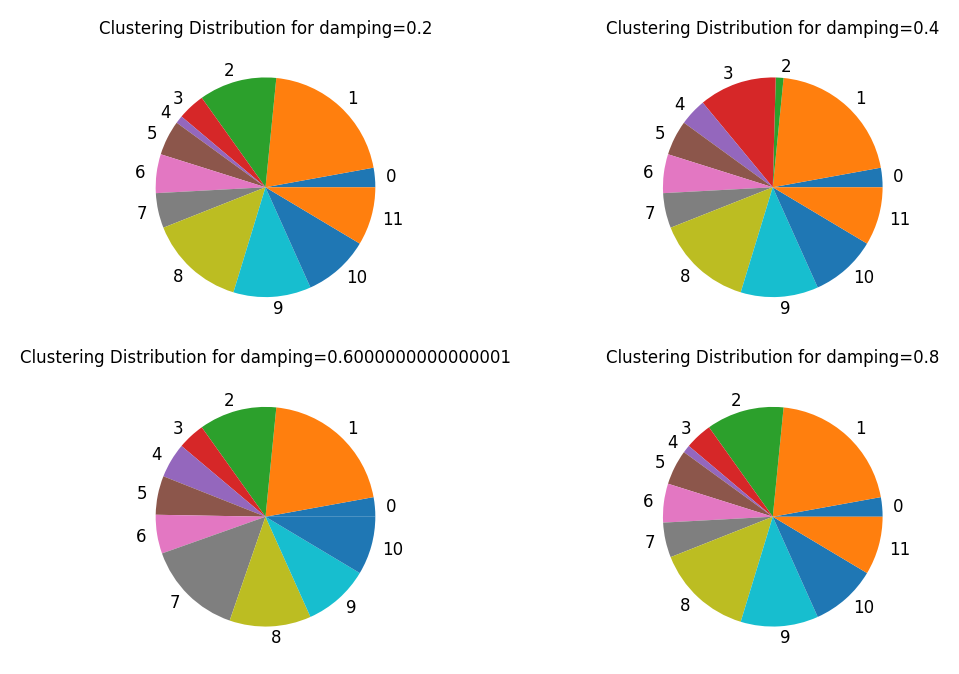

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4),dpi=200);

for n in range (4):
  values = results[n]
  labels = values['labels']
  unique, counts = np.unique(labels, return_counts=True)

  i = int(n/2)
  j = n%2
  axes[i][j].pie(counts, labels = unique, textprops={'fontsize': 6});
  axes[i][j].set_title(f'Clustering Distribution for damping={0.2 + 0.2*n}', fontsize=6);

clear_output(wait=True)

In [34]:
for n in range(4):
  values = results[n]
  labels = values['labels']

  printmd(string=f'**Country distribution for damping={0.2 + 0.2*n}**', color='blue')

  unique, counts = np.unique(labels, return_counts=True)

  for i in range(len(unique)):
    pp.pprint(df_2019[labels==i].index)
  print(100 * '-')
  print('\n\n')

<span style='color:blue'>**Country distribution for damping=0.2**</span>

Index([' Bahrain', ' Kuwait', ' Oman', ' Qatar', ' United Arab Emirates'], dtype='object', name='Country')
Index([' Australia', ' Belarus', ' Belgium', ' Bulgaria', ' Canada', ' Cuba',
       ' Czechia', ' Denmark', ' Estonia', ' Finland', ' France', ' Germany',
       ' Greece', ' Hong Kong, China (SAR)', ' Hungary', ' Iceland', ' Italy',
       ' Japan', ' Korea (Republic of)', ' Latvia', ' Lithuania',
       ' Luxembourg', ' Malta', ' Netherlands', ' New Zealand', ' Norway',
       ' Portugal', ' Russian Federation', ' Singapore', ' Spain', ' Sweden',
       ' Switzerland', ' Ukraine', ' United Kingdom', ' United States',
       ' Uruguay'],
      dtype='object', name='Country')
Index([' Argentina', ' Bahamas', ' Brazil', ' Brunei Darussalam', ' Chile',
       ' Colombia', ' Costa Rica', ' Dominican Republic', ' El Salvador',
       ' Iran (Islamic Republic of)', ' Israel', ' Lebanon', ' Libya',
       ' Malaysia', ' Mexico', ' Peru', ' Saudi Arabia', ' Tunisia', ' Turkey',
       '

<span style='color:blue'>**Country distribution for damping=0.4**</span>

Index([' Bahrain', ' Kuwait', ' Oman', ' Qatar', ' United Arab Emirates'], dtype='object', name='Country')
Index([' Australia', ' Belarus', ' Belgium', ' Bulgaria', ' Canada', ' Cuba',
       ' Czechia', ' Denmark', ' Estonia', ' Finland', ' France', ' Germany',
       ' Greece', ' Hong Kong, China (SAR)', ' Hungary', ' Iceland', ' Italy',
       ' Japan', ' Korea (Republic of)', ' Latvia', ' Lithuania',
       ' Luxembourg', ' Malta', ' Netherlands', ' New Zealand', ' Norway',
       ' Portugal', ' Russian Federation', ' Singapore', ' Spain', ' Sweden',
       ' Switzerland', ' Ukraine', ' United Kingdom', ' United States',
       ' Uruguay'],
      dtype='object', name='Country')
Index([' China', ' India'], dtype='object', name='Country')
Index([' Argentina', ' Bahamas', ' Brazil', ' Brunei Darussalam', ' Chile',
       ' Colombia', ' Costa Rica', ' Dominican Republic', ' El Salvador',
       ' Iran (Islamic Republic of)', ' Israel', ' Lebanon', ' Libya',
       ' Malaysia', ' Mexico

<span style='color:blue'>**Country distribution for damping=0.6000000000000001**</span>

Index([' Bahrain', ' Kuwait', ' Oman', ' Qatar', ' United Arab Emirates'], dtype='object', name='Country')
Index([' Australia', ' Belarus', ' Belgium', ' Bulgaria', ' Canada', ' Cuba',
       ' Czechia', ' Denmark', ' Estonia', ' Finland', ' France', ' Germany',
       ' Greece', ' Hong Kong, China (SAR)', ' Hungary', ' Iceland', ' Italy',
       ' Japan', ' Korea (Republic of)', ' Latvia', ' Lithuania',
       ' Luxembourg', ' Malta', ' Netherlands', ' New Zealand', ' Norway',
       ' Portugal', ' Russian Federation', ' Singapore', ' Spain', ' Sweden',
       ' Switzerland', ' Ukraine', ' United Kingdom', ' United States',
       ' Uruguay'],
      dtype='object', name='Country')
Index([' Argentina', ' Bahamas', ' Brazil', ' Brunei Darussalam', ' Chile',
       ' Colombia', ' Costa Rica', ' Dominican Republic', ' El Salvador',
       ' Iran (Islamic Republic of)', ' Israel', ' Lebanon', ' Libya',
       ' Malaysia', ' Mexico', ' Peru', ' Saudi Arabia', ' Tunisia', ' Turkey',
       '

<span style='color:blue'>**Country distribution for damping=0.8**</span>

Index([' Bahrain', ' Kuwait', ' Oman', ' Qatar', ' United Arab Emirates'], dtype='object', name='Country')
Index([' Australia', ' Belarus', ' Belgium', ' Bulgaria', ' Canada', ' Cuba',
       ' Czechia', ' Denmark', ' Estonia', ' Finland', ' France', ' Germany',
       ' Greece', ' Hong Kong, China (SAR)', ' Hungary', ' Iceland', ' Italy',
       ' Japan', ' Korea (Republic of)', ' Latvia', ' Lithuania',
       ' Luxembourg', ' Malta', ' Netherlands', ' New Zealand', ' Norway',
       ' Portugal', ' Russian Federation', ' Singapore', ' Spain', ' Sweden',
       ' Switzerland', ' Ukraine', ' United Kingdom', ' United States',
       ' Uruguay'],
      dtype='object', name='Country')
Index([' Argentina', ' Bahamas', ' Brazil', ' Brunei Darussalam', ' Chile',
       ' Colombia', ' Costa Rica', ' Dominican Republic', ' El Salvador',
       ' Iran (Islamic Republic of)', ' Israel', ' Lebanon', ' Libya',
       ' Malaysia', ' Mexico', ' Peru', ' Saudi Arabia', ' Tunisia', ' Turkey',
       '

**The End**